<a href="https://colab.research.google.com/github/jitesh-raut/Predictive-Analysis/blob/main/Predictive%20Analysis%20Using%20Python%3A%20Forecasting%20Apple%E2%80%99s%20Stock%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
# Load historical stock price data for Apple
apple_stock_data = pd.read_csv('apple_stock_data.csv')

In [3]:
#Cleaning data
apple_stock_data.dropna(inplace=True)

# calculating 50-day moving average
apple_stock_data['MA_50'] = apple_stock_data['Close'].rolling(window=50).mean()

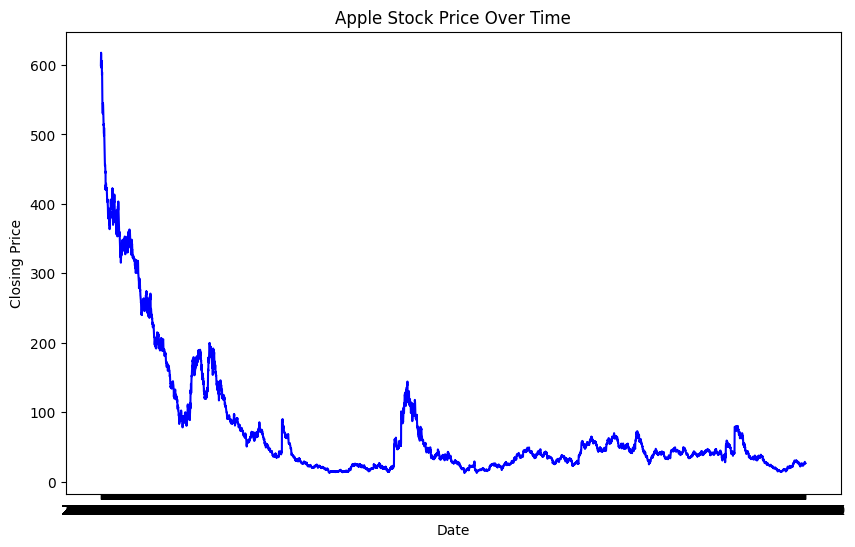

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(apple_stock_data['Date'], apple_stock_data['Close'], color='blue')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [7]:
# Select relevant features
features = ['Close', 'Volume']

# Example of adding technical indicators (e.g., RSI)
from ta import momentum
apple_stock_data['RSI'] = momentum.rsi(apple_stock_data['Close'])

In [8]:
# Import ARIMA model from statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [9]:
# Split data into training and testing sets
train_size = int(len(apple_stock_data) * 0.8)
train, test = apple_stock_data[:train_size], apple_stock_data[train_size:]

# Train the ARIMA model
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

In [10]:
# Generate predictions for testing set
predictions = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics (e.g., MSE, RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Close'], predictions)

In [17]:
# Generate future dates for forecasting
future_dates = pd.date_range(start='2012-04-01', end='2012-07-31')

# Forecast future stock prices
future_predictions = model_fit.forecast(steps=len(future_dates))

In [19]:
# Example of hyperparameter tuning
model = ARIMA(train['Close'], order=(5,2,1))
model_fit = model.fit()

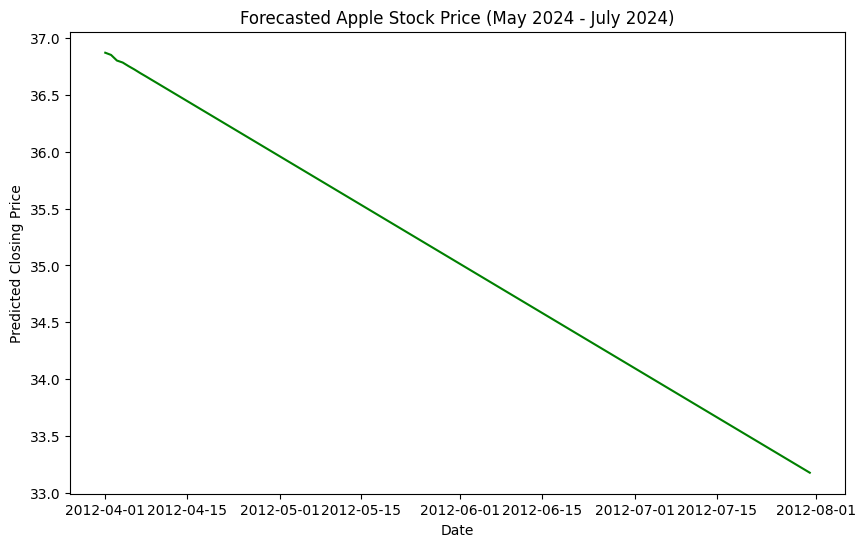

In [21]:
# Visualize forecasted stock prices
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, color='green')
plt.title('Forecasted Apple Stock Price (May 2024 - July 2024)')
plt.xlabel('Date')
plt.ylabel('Predicted Closing Price')
plt.show()